# Titanic Sinking
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [30]:
titanic = titanic.drop(['embarked', 'class', 'who', 'alive'], axis=1)

<AxesSubplot: xlabel='fare', ylabel='Count'>

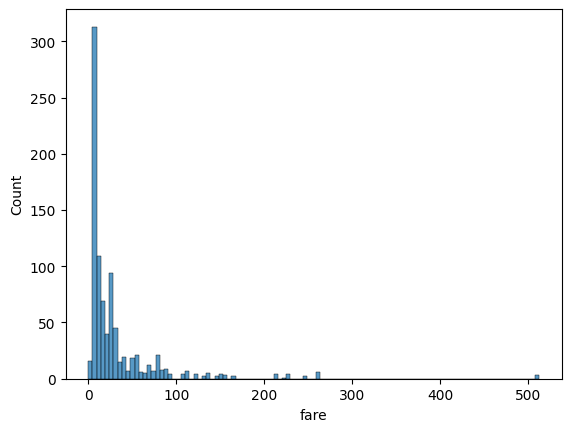

In [31]:
sns.histplot(titanic, x='fare')

In [32]:
tmean = titanic['fare'].mean()

In [ ]:
titanic['difference from mean (fare)'] = titanic['fare'] - tmean
titanic

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,deck,embark_town,alone,difference from mean
0,0,3,male,22.0,1,0,7.2500,True,NaN,Southampton,False,-24.954208
1,1,1,female,38.0,1,0,71.2833,False,C,Cherbourg,False,39.079092
2,1,3,female,26.0,0,0,7.9250,False,NaN,Southampton,True,-24.279208
3,1,1,female,35.0,1,0,53.1000,False,C,Southampton,False,20.895792
4,0,3,male,35.0,0,0,8.0500,True,NaN,Southampton,True,-24.154208
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,True,NaN,Southampton,True,-19.204208
887,1,1,female,19.0,0,0,30.0000,False,B,Southampton,True,-2.204208
888,0,3,female,NaN,1,2,23.4500,False,NaN,Southampton,False,-8.754208
889,1,1,male,26.0,0,0,30.0000,True,C,Cherbourg,True,-2.204208


In [34]:
tstd = titanic['fare'].std()


In [40]:
titanic['fare zscore'] = (titanic['fare'] - tmean) / tstd
titanic

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,deck,embark_town,alone,difference from mean,fare_zscore,fare zscore
0,0,3,male,22.0,1,0,7.2500,True,NaN,Southampton,False,-24.954208,-0.502163,-0.502163
1,1,1,female,38.0,1,0,71.2833,False,C,Cherbourg,False,39.079092,0.786404,0.786404
2,1,3,female,26.0,0,0,7.9250,False,NaN,Southampton,True,-24.279208,-0.488580,-0.488580
3,1,1,female,35.0,1,0,53.1000,False,C,Southampton,False,20.895792,0.420494,0.420494
4,0,3,male,35.0,0,0,8.0500,True,NaN,Southampton,True,-24.154208,-0.486064,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,True,NaN,Southampton,True,-19.204208,-0.386454,-0.386454
887,1,1,female,19.0,0,0,30.0000,False,B,Southampton,True,-2.204208,-0.044356,-0.044356
888,0,3,female,NaN,1,2,23.4500,False,NaN,Southampton,False,-8.754208,-0.176164,-0.176164
889,1,1,male,26.0,0,0,30.0000,True,C,Cherbourg,True,-2.204208,-0.044356,-0.044356


<AxesSubplot: xlabel='fare_zscore', ylabel='Count'>

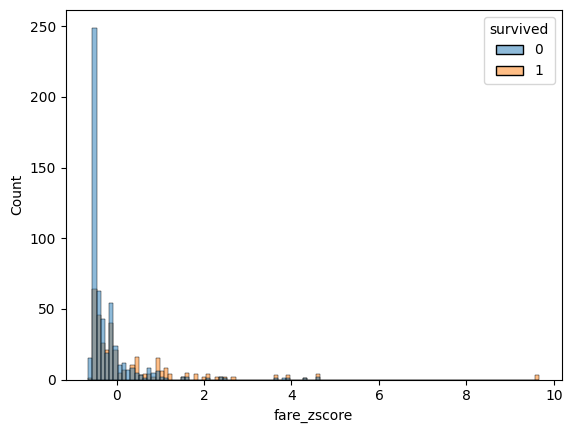

In [41]:
sns.histplot(titanic, x='fare_zscore', hue='survived')

In [42]:
agemean = titanic['age'].mean()
agestd = titanic['age'].std()

In [43]:
titanic['difference from mean (age)'] = titanic['age'] - agemean
titanic['age zscore'] = (titanic['age'] - agemean) / agestd
titanic

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,deck,embark_town,alone,difference from mean,fare_zscore,fare zscore,difference from mean (age),age zscore
0,0,3,male,22.0,1,0,7.2500,True,NaN,Southampton,False,-24.954208,-0.502163,-0.502163,-7.699118,-0.530005
1,1,1,female,38.0,1,0,71.2833,False,C,Cherbourg,False,39.079092,0.786404,0.786404,8.300882,0.571430
2,1,3,female,26.0,0,0,7.9250,False,NaN,Southampton,True,-24.279208,-0.488580,-0.488580,-3.699118,-0.254646
3,1,1,female,35.0,1,0,53.1000,False,C,Southampton,False,20.895792,0.420494,0.420494,5.300882,0.364911
4,0,3,male,35.0,0,0,8.0500,True,NaN,Southampton,True,-24.154208,-0.486064,-0.486064,5.300882,0.364911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,True,NaN,Southampton,True,-19.204208,-0.386454,-0.386454,-2.699118,-0.185807
887,1,1,female,19.0,0,0,30.0000,False,B,Southampton,True,-2.204208,-0.044356,-0.044356,-10.699118,-0.736524
888,0,3,female,NaN,1,2,23.4500,False,NaN,Southampton,False,-8.754208,-0.176164,-0.176164,NaN,NaN
889,1,1,male,26.0,0,0,30.0000,True,C,Cherbourg,True,-2.204208,-0.044356,-0.044356,-3.699118,-0.254646


In [44]:
titanic.to_csv('titanic.csv', index=False)